In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import trapz
from typing import Tuple

In [7]:
#Peak a = Reference (PO4) and Peak b = unknown (CO3)
peak_a = 1100
peak_b = 1400
range_auc = 50

#Peak for normalization: start_c, end_d are the wavenumber points of start/end where the peak to normalize 
start_c = 1000
end_c = 1100

#Graph format
x_label = "Wavenumber (cm$^{-1}$)"
y_label = "Absorbance (a.u.)"
graph_title = ""
legend_title = ""
lower_x_lim = 500
upper_x_lim = 2500
lower_y_lim = -0.03
upper_y_lim = 0.5

In [16]:
def read_asp(file_path:str) -> Tuple[np.array, np.array]:
    """
    Read an asp file created with X machine
    Args:
        file_path: the path pointing towards a text file that has
        the following format:
            line 0: number of points (int)
            line 1: x_start (float)
            line 2: x_end (float)
            line 3: ? (int)
            line 4: ? (int)
            line 5: ? (int)
            lines 6-end: y_data (float)
    return: tuple with two numpy arrays (x, y)
    """
    with open(file_path, mode="r") as file:
        n_data_points = int(next(file))
        x_start = float(next(file))
        x_end = float(next(file))
        _ = int(next(file)) # only specified to ignore those lines
        _ = int(next(file))
        _ = int(next(file))
        y_data = [float(i) for i in file]
        assert len(y_data) == n_data_points, f"The number of expected y_values is {n_data_points}, but {len(y_data)} were found"
    x = np.linspace(x_start, x_end, n_data_points)
    y = np.array(y_data)
    
    if "PLGA" in file_path:
        y_range = y[(x<end_c)&(x>start_c)]
        y_max_normal = max(y_range)
            #TO NORMALIZE
        y_normal = [(i - min(y_data))/(y_max_normal - min(y_data)) for i in y_data]
    else:
        y_normal = [(i - min(y_data))/(max(y_data) - min(y_data)) for i in y_data]
    return x, y, y_normal

def ratio_a_b_peaks(x,y,peak_a, peak_b, range_auc):
    x_start_a = peak_a - range_auc
    x_stop_a = peak_a + range_auc
    x_start_b = peak_b - range_auc
    x_stop_b = peak_b + range_auc
    auc_a = auc_value(x,y,x_start_a, x_stop_a)
    auc_b = auc_value(x,y,x_start_b, x_stop_b)
    a_b_ratio = auc_b/auc_a
    return  a_b_ratio

def auc_value(x, y, x_start, x_stop):
    x_positions = []
    y_values = []
    x_positions = np.where((x < x_stop) & (x > x_start))
    y_values = [y[i] for i in x_positions]
    auc = np.trapz(y_values)
    return auc

def plot_many_ftir(title, *file_paths, xlabel=x_label, ylabel=y_label):
    """Returns a figure"""
    cm = 1/1.5
    fig = plt.figure(figsize=(2*7.5*cm, 2*5*cm))
    #ax, unused = fig.subplots(2, 1, sharex=True) # This can create multiple plots in a single figure
    ax = fig.subplots(sharex=True)
    for fp,l in file_paths:
        x, y, y_normal = read_asp(fp) 
        a_b_ratio = ratio_a_b_peaks(x,y,peak_a, peak_b, range_auc)
        print("CO3/PO4 ratio of", l, " = ",a_b_ratio)
        ax.plot(x,y_normal, label=l)
           
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    plt.xlim(lower_x_lim, upper_x_lim)
    #plt.ylim(lower_y_lim, upper_y_lim)
    plt.legend(title=legend_title, fontsize=18, title_fontsize=18, loc='upper left')
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    ax.invert_xaxis()
    return fig

    



CO3/PO4 ratio of 24  =  [0.23803353]
CO3/PO4 ratio of 48  =  [0.22124256]
CO3/PO4 ratio of 100  =  [0.2987704]


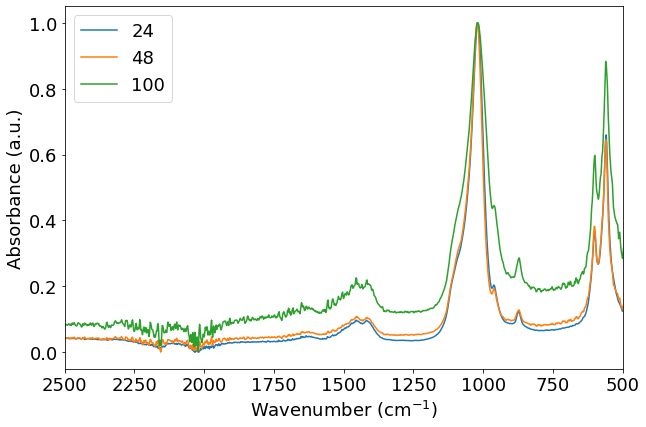

In [19]:
fig_many_ftir = plot_many_ftir(graph_title,
(r"C:\Users\YaelSuarez\OneDrive - Karolinska Institutet\Documents\KI\Experiments\FTIR\Biomineralization powder\t24 3_8 1p67_2022-03-30T17-43-43.asp", "24"),
(r"C:\Users\YaelSuarez\OneDrive - Karolinska Institutet\Documents\KI\Experiments\FTIR\Biomineralization powder\t48 3_8 1p67_2022-03-31T19-05-48.asp", "48"),
(r"C:\Users\YaelSuarez\OneDrive - Karolinska Institutet\Documents\KI\Experiments\FTIR\Biomineralization powder\t100 3_8 1p67_2022-03-31T19-11-24.asp", "100"),
)
